# Graph theory

See https://github.com/multinetlab-amsterdam/network_TDA_tutorial/blob/main/1-network_analysis.ipynb for tutorial on network analysis

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import glob as glob
import pickle 
from scripts import func
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import normalize


In [2]:

def get_features(res_path, folder):
    path = glob.glob(os.path.join(res_path, folder, 'features*'))
    features = dict()
    keys = ['pre', 'post', 'contrast']
    for p, key in zip(path,keys):
        features[key] = np.load(p, allow_pickle=True)
    return features
def load_dict(p,folder, name):
    with open(os.path.join(p,folder, name), 'rb') as f:
        results = pickle.load(f)
    return results
def load_all(p, folder, atlas_name):
    atlas, atlas_labels, atlas_type, confounds = func.load_choose_atlas(atlas_name=atlas_name)

    results = load_dict(p, folder, 'dict_results.pkl')
    features = get_features(p, folder)
    return results, atlas, atlas_labels

p = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\results\results_con'


results, atlas, labels = load_all(p, 'difumo64_correlation', 'difumo64')
#results, atlas, labels = load_all(p, 'difumo64_precision', 'difumo64')
#results, atlas, labels = load_all(p, 'yeo7_correlation', 'yeo_7')


Loading atlas:  difumo64


In [17]:
results.keys()

dict_keys(['pre_series', 'post_series', 'seed_pre_series', 'seed_post_series', 'seed_to_pre_correlations', 'seed_to_post_correlations', 'pre_connectomes', 'pre_mean_connectome', 'post_connectomes', 'post_mean_connectome', 'zcontrast_mean_connectome', 'contrast_connectomes', 'mean_seed_pre_connectome', 'mean_seed_post_connectome', 'mean_seed_contrast_connectome', 'preX', 'postX', 'contrastX'])

In [27]:
import numpy as np
np.unique(atlas.get_fdata(), return_counts=True)


(array([0.00000000e+00, 1.00297621e-06, 1.00594480e-06, ...,
        1.23702106e-03, 1.25465193e-03, 1.25810597e-03]),
 array([84979658,        1,        1, ...,        1,        1,        1],
       dtype=int64))

In [36]:
pre_mean_connectome = results['pre_mean_connectome']
post_mean_connectome = results['post_mean_connectome']
pre_connectomes = results['pre_connectomes']
post_connectomes = results['post_connectomes']
print(pre_mean_connectome.min(), post_mean_connectome.min())
contrast_mean_connectome = results['zcontrast_mean_connectome']
print(contrast_mean_connectome.max(), contrast_mean_connectome.min())
zcontrast = contrast_mean_connectome 

-0.2996506073974591 -0.22595465432865147
0.15656828331283304 -0.14418826322999684


In [42]:
# zeros for negatives edges
abs_pre_connectome = [np.maximum(connectome, 0) for connectome in results['pre_connectomes']]
abs_post_connectome = [np.maximum(connectome, 0) for connectome in results['post_connectomes']]
abs_mean_post = abs_post_connectomes.mean(axis=0)



AttributeError: 'list' object has no attribute 'mean'

In [32]:
# Mean testing

mean_pre = pre_connectomes.mean(axis=0)
mean_post = post_connectomes.mean(axis=0)
#np.unique([mean_pre == pre_mean_connectome])
abs_pre_connectomes = abs(pre_connectomes)

array([ True])

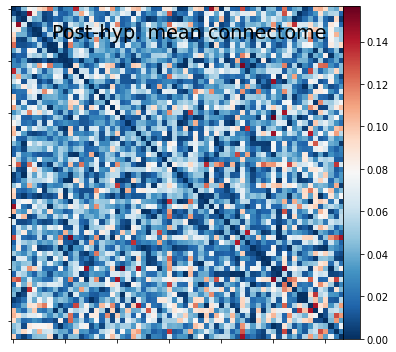

In [10]:
from nilearn import plotting

# Mask out the major diagonal

plotting.plot_matrix(
    zcontrast, colorbar=True, title = 'Post-hyp. mean connectome'
)

Find extreme values for tresholds

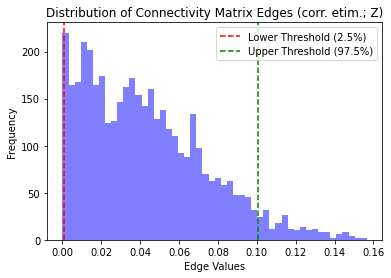

Lower Threshold (2.5%): 0.0006460915202322892
Upper Threshold (97.5%): 0.10062003810174017


In [11]:
# Histogram highest 5% values
import matplotlib.pyplot as plt
import numpy as np

# Flatten the connectivity matrix to a 1D array
edges_values = zcontrast.flatten()

# Plot the histogram of edges' values
plt.hist(edges_values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Edge Values')
plt.ylabel('Frequency')
plt.title('Distribution of Connectivity Matrix Edges (corr. etim.; Z)')

# Find the threshold values at the 2.5% extremes
lower_threshold = np.percentile(edges_values, 2.5)
upper_threshold = np.percentile(edges_values, 95)

# Display the threshold values on the plot
plt.axvline(x=lower_threshold, color='red', linestyle='--', label='Lower Threshold (2.5%)')
plt.axvline(x=upper_threshold, color='green', linestyle='--', label='Upper Threshold (97.5%)')
plt.legend()

# Show the plot
plt.show()

# Print the threshold values
print("Lower Threshold (2.5%):", lower_threshold)
print("Upper Threshold (97.5%):", upper_threshold)

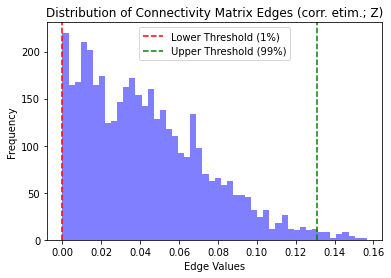

Lower Threshold (1%): 0.0
Upper Threshold (99%): 0.1308507784432911


In [13]:
#Hist highest 1% values
import matplotlib.pyplot as plt
import numpy as np

# Flatten the connectivity matrix to a 1D array
edges_values = zcontrast.flatten()

# Plot the histogram of edges' values
plt.hist(edges_values, bins=50, color='blue', alpha=0.5)
plt.xlabel('Edge Values')
plt.ylabel('Frequency')
plt.title('Distribution of Connectivity Matrix Edges (corr. etim.; Z)')

# Find the lower and upper threshold values at the desired percentiles
lower_threshold = np.percentile(edges_values, 1)
upper_threshold = np.percentile(edges_values, 99)

# Display the threshold values on the plot
plt.axvline(x=lower_threshold, color='red', linestyle='--', label='Lower Threshold (1%)')
plt.axvline(x=upper_threshold, color='green', linestyle='--', label='Upper Threshold (99%)')
plt.legend()

# Show the plot
plt.show()

# Print the threshold values
print("Lower Threshold (1%):", lower_threshold)
print("Upper Threshold (99%):", upper_threshold)


## 2. post-pre contrast correlation (figures)

In [14]:
zcontrast = abs(contrast_mean_connectome)
# Define the absolute threshold values
positive_threshold =   upper_threshold
negative_threshold = lower_threshold

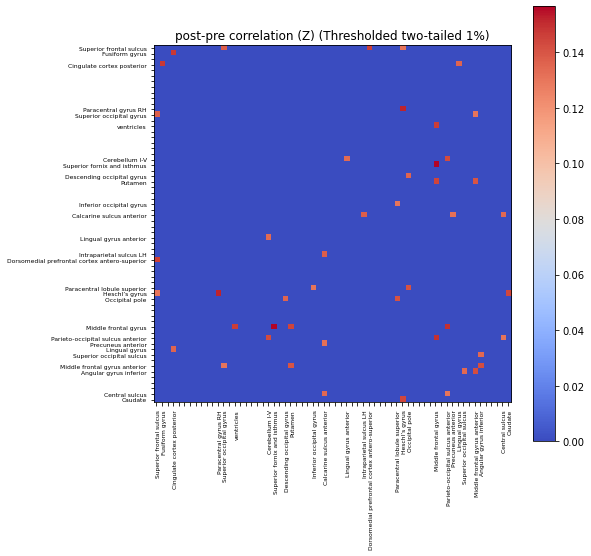

In [9]:
# Apply the thresholds to the connectome matrix
zcontrast_thresholded = np.where(zcontrast >= positive_threshold, zcontrast, 0)
zcontrast_thresholded = np.where(zcontrast <= negative_threshold, zcontrast, zcontrast_thresholded)

# Get the indices of the significant labels based on the thresholds
significant_labels_indices = np.where(np.sum(np.abs(zcontrast_thresholded), axis=0) > 0)[0]
significant_labels = [labels[i] if i in significant_labels_indices else ' ' for i in range(len(labels))]

fig, ax = plt.subplots(figsize=(8, 8))  # Adjust the figure size as needed
im = ax.imshow(zcontrast_thresholded, cmap='coolwarm')

# Set the tick labels and font size
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired
ax.set_yticklabels(significant_labels, fontsize=6)  # Adjust the label font size as desired

# Rotate the x-axis tick labels for better readability if needed
plt.setp(ax.get_xticklabels(), rotation=90, ha="right", rotation_mode="anchor")

# Create a colorbar
cbar = ax.figure.colorbar(im, ax=ax)

# Set the title
ax.set_title('post-pre correlation (Z) (Thresholded two-tailed 1%)')

# Show the plot
plt.show()

In [157]:
# print highest edge values
zcontrast_thresholded = np.where(zcontrast >= positive_threshold, zcontrast, 0)
zcontrast_thresholded = np.where(zcontrast <= negative_threshold, zcontrast, zcontrast_thresholded)

# Get the indices of the significant labels based on the thresholds
significant_labels_indices = np.where(np.sum(np.abs(zcontrast_thresholded), axis=0) > 0)[0]

# Create a networkx graph with only the lower half of the connectivity matrix
import networkx as nx

G = nx.Graph()
for i in significant_labels_indices:
    for j in range(i + 1, len(labels)):
        edge_weight = zcontrast_thresholded[i, j]
        if edge_weight != 0:
            G.add_edge(labels[i], labels[j], weight=edge_weight)

# Sort the edges based on their weights in descending order
sorted_edges = sorted(G.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)

# Find and print the pairs of nodes with the highest edge values first
for u, v, data in sorted_edges:
    print(f"[{u} - {v}]; Z={data['weight']:.4f}")


[L Limbic - R Limbic]; Z=0.1560
[R Limbic - R Visual]; Z=-0.0840


In [183]:
#Number of connections on matrix
# Create an empty graph
G = nx.Graph()

# Get the number of nodes in the matrix
num_nodes = zcontrast_thresholded.shape[0]

# Add nodes to the graph with labels
node_labels = [f"Node {i} ({labels[i]})" for i in range(num_nodes)]
G.add_nodes_from(range(num_nodes), label=node_labels)

# Iterate over the lower triangle of the thresholded matrix and add edges with non-zero values to the graph
for i in range(num_nodes):
    for j in range(i):  # Only iterate over the lower triangle
        edge_value = zcontrast_thresholded[i, j]
        if edge_value != 0 and labels[i] != ' ' and labels[j] != ' ':
            G.add_edge(i, j, weight=edge_value)

# Create a dictionary to store the number of non-empty connections for each node
non_empty_connections_dict = {node: 0 for node in G.nodes()}

# Count the number of non-empty connections for each node
for node in G.nodes():
    non_empty_connections = [1 for nbr in G[node] if G.nodes[nbr]['label'] != ' ']
    non_empty_connections_dict[node] = sum(non_empty_connections)

# Sort nodes based on the number of non-empty connections in descending order
sorted_nodes = sorted(non_empty_connections_dict.keys(), key=lambda x: non_empty_connections_dict[x], reverse=True)

# Print the nodes with their labels and the number of non-zero connections with non-empty labels
for node in sorted_nodes:
    if non_empty_connections_dict[node] >= 1:
        idx = int(node)
        print(f"{labels[idx]}: {non_empty_connections_dict[node]} non-zero connections")


Middle frontal gyrus: 4 non-zero connections
Superior frontal sulcus: 3 non-zero connections
Calcarine sulcus anterior: 3 non-zero connections
Heschl’s gyrus: 3 non-zero connections
Parieto-occipital sulcus anterior: 3 non-zero connections
Middle frontal gyrus anterior: 3 non-zero connections
Cingulate cortex posterior: 2 non-zero connections
Superior occipital gyrus: 2 non-zero connections
Cerebellum I-V: 2 non-zero connections
Putamen: 2 non-zero connections
Paracentral lobule superior: 2 non-zero connections
Occipital pole: 2 non-zero connections
Angular gyrus inferior: 2 non-zero connections
Central sulcus: 2 non-zero connections
Fusiform gyrus: 1 non-zero connections
Paracentral gyrus RH: 1 non-zero connections
ventricles: 1 non-zero connections
Superior fornix and isthmus: 1 non-zero connections
Descending occipital gyrus: 1 non-zero connections
Inferior occipital gyrus: 1 non-zero connections
Lingual gyrus anterior: 1 non-zero connections
Intraparietal sulcus LH: 1 non-zero conn

In [160]:
from nilearn import plotting 
import matplotlib.pyplot as plt

# change depending on atlas type
coords = plotting.find_probabilistic_atlas_cut_coords(atlas)
coords = plotting.find_parcellation_cut_coords(atlas)
view = plotting.view_connectome(A,coords, title = 'Post-pre (99%; correlation (z); DiFuMo64)')

output_file = "images/1imgs_difumo/contrast_correlation_viewcon.png"  # Specify the desired output file path and extension
view.save_as_html(output_file)
view


In [184]:
import matplotlib.cm as cm
from scipy import stats
from scipy.stats import ttest_1samp

A = abs(results['zcontrast_mean_connectome'])
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels)))
G.edges.data('weight')
edge_weights = G.edges.data('weight')



In [185]:
#'Gbin' Binarized graph based on previous 1% threshold
# Apply the thresholds to the connectome matrix
zcontrast_binarized = np.where(np.abs(zcontrast_thresholded) > 0, 1, 0)

# Create the graph
Gbin = nx.from_numpy_matrix(zcontrast_binarized)

# Assign node labels
labels_dict = {i: label for i, label in enumerate(significant_labels)}
nx.set_node_attributes(Gbin, labels_dict, 'label')

# Convert the edge weights to integers (0 or 1)
edge_weights_dict = {(u, v): int(weight) for u, v, weight in Gbin.edges(data='weight')}
nx.set_edge_attributes(Gbin, edge_weights_dict, 'weight')


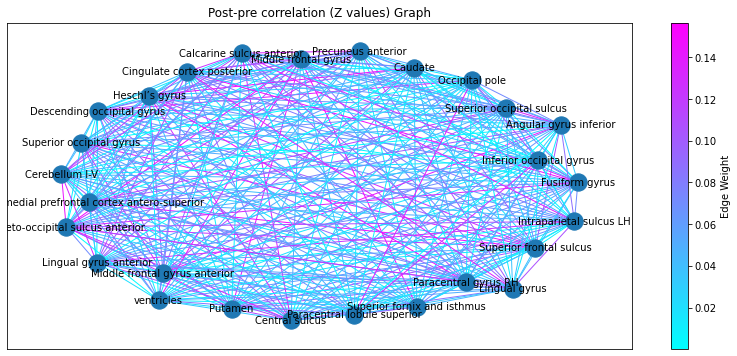

In [186]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Collect node names for edges that meet the thresholds
nodes_to_keep = set()
for u, v, data in G.edges(data=True):
    if data['weight'] <= negative_threshold or data['weight'] >= positive_threshold:
        nodes_to_keep.add(u)
        nodes_to_keep.add(v)

# Create a subgraph with the filtered nodes
H = G.subgraph(nodes_to_keep)

# Set the figure size
plt.figure(figsize=(14, 6))

# Adjust the layout algorithm parameters
pos = nx.spring_layout(H, k=8)

# Extract edge weights
edge_weights = [data['weight'] for _, _, data in H.edges(data=True)]
min_edge_weight = min(edge_weights)
max_edge_weight = max(edge_weights)

# Define colormap
cmap = cm.get_cmap('cool')  # Choose a colormap

# Draw the subgraph with colored edges
nx.draw_networkx_nodes(H, pos)
nx.draw_networkx_labels(H, pos, font_size=10)
edge_colors = nx.draw_networkx_edges(H, pos, edge_color=edge_weights, edge_cmap=cmap)

# Add color bar
sm = cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_edge_weight, vmax=max_edge_weight))
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Edge Weight')

save_path = os.path.join('images', 'contrast_correlation_graph.png')
plt.title('Post-pre correlation (Z values) Graph')
plt.savefig(save_path)
plt.show()

Graph metrics

Nodes sorted by degree (highest to lowest):
Parieto-occipital sulcus anterior: 4.031725939878969
Calcarine sulcus anterior: 3.9398537221918883
Cuneus: 3.7558719897393433
Middle frontal gyrus: 3.720126359405067
Middle frontal gyrus anterior: 3.636612634760937
Superior frontal sulcus: 3.592002308932098
Angular gyrus inferior: 3.5790401624372037
Heschl’s gyrus: 3.5628942260935133
Cingulate cortex posterior: 3.41798960474119
Parieto-occipital sulcus middle: 3.402272001984831
Lingual gyrus anterior: 3.2419703045461103
Dorsomedial prefrontal cortex antero-superior: 3.2306304964062997
Superior frontal gyrus medial: 3.202542980258556
Central sulcus: 3.157235217354988
Middle temporal gyrus: 3.127662109008098
Lingual gyrus: 3.116013157944299
Cerebellum I-V: 3.0953119461300234
Putamen: 3.048338586286974
Superior occipital gyrus: 3.0444572453330667
Angular gyrus superior: 2.948371208478816
Descending occipital gyrus: 2.931046265716997
Parieto-occipital sulcus superior: 2.923798408381681
Paracentra

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


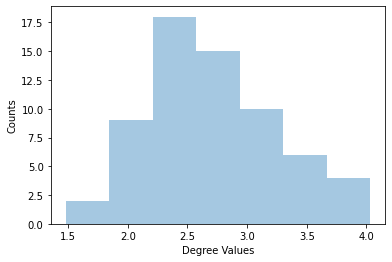

<Figure size 576x432 with 0 Axes>

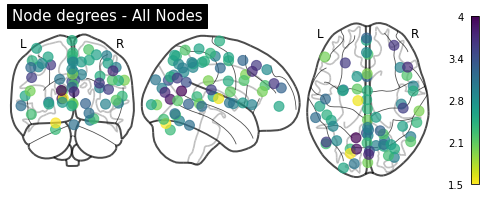

<Figure size 576x432 with 0 Axes>

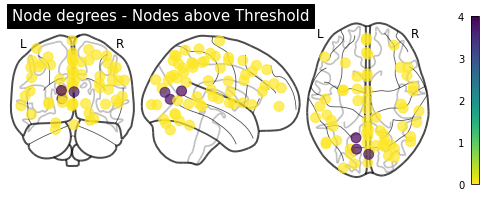

In [187]:
# (precision) Mean graph DEGREE
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.05)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")
# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - All Nodes')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - Nodes above Threshold')
plt.show()


Nodes sorted by degree (highest to lowest):
Parieto-occipital sulcus anterior: 4.031725939878969
Calcarine sulcus anterior: 3.9398537221918883
Cuneus: 3.7558719897393433
Middle frontal gyrus: 3.720126359405067
Middle frontal gyrus anterior: 3.636612634760937
Superior frontal sulcus: 3.592002308932098
Angular gyrus inferior: 3.5790401624372037
Heschl’s gyrus: 3.5628942260935133
Cingulate cortex posterior: 3.41798960474119
Parieto-occipital sulcus middle: 3.402272001984831
Lingual gyrus anterior: 3.2419703045461103
Dorsomedial prefrontal cortex antero-superior: 3.2306304964062997
Superior frontal gyrus medial: 3.202542980258556
Central sulcus: 3.157235217354988
Middle temporal gyrus: 3.127662109008098
Lingual gyrus: 3.116013157944299
Cerebellum I-V: 3.0953119461300234
Putamen: 3.048338586286974
Superior occipital gyrus: 3.0444572453330667
Angular gyrus superior: 2.948371208478816
Descending occipital gyrus: 2.931046265716997
Parieto-occipital sulcus superior: 2.923798408381681
Paracentra

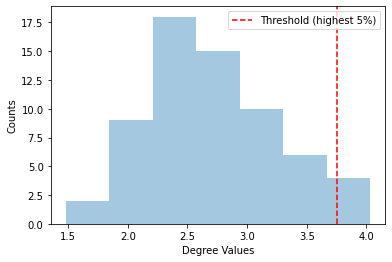

<Figure size 576x432 with 0 Axes>

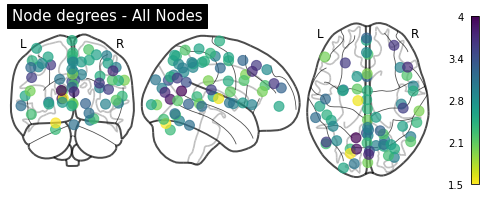

<Figure size 576x432 with 0 Axes>

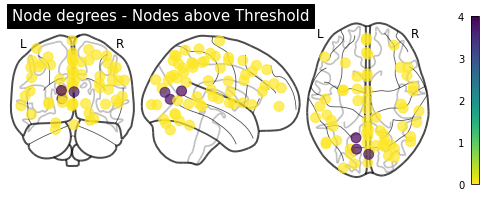

In [188]:
# (correlation) Mean graph DEGREE
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.05)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")
# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - All Nodes')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node degrees - Nodes above Threshold')
plt.show()


Nodes sorted by closeness centrality (highest to lowest):
Calcarine sulcus anterior: 0.06605222734254992
Middle frontal gyrus: 0.05837173579109063
Parieto-occipital sulcus anterior: 0.05683563748079877
Middle frontal gyrus anterior: 0.05325140809011777
Superior frontal sulcus: 0.05069124423963134
Heschl’s gyrus: 0.04045058883768561
Angular gyrus inferior: 0.037378392217101895
Cuneus: 0.02713773681515617
Central sulcus: 0.022017409114183307
Paracentral lobule superior: 0.020993343573988736
Descending occipital gyrus: 0.019457245263696875
Parieto-occipital sulcus middle: 0.014848950332821301
Paracentral gyrus RH: 0.011776753712237582
Putamen: 0.011776753712237582
Angular gyrus superior: 0.011776753712237582
Occipital pole: 0.011776753712237582
Middle temporal gyrus: 0.011776753712237582
Fusiform gyrus: 0.010752688172043012
Inferior frontal sulcus: 0.010240655401945725
Superior frontal gyrus medial: 0.009728622631848437
Lingual gyrus anterior: 0.009728622631848437
Cingulate cortex posteri

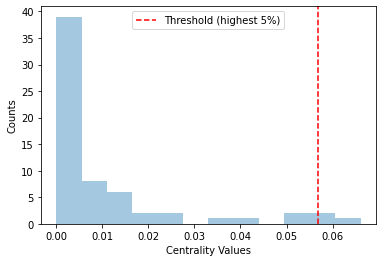

<Figure size 576x432 with 0 Axes>

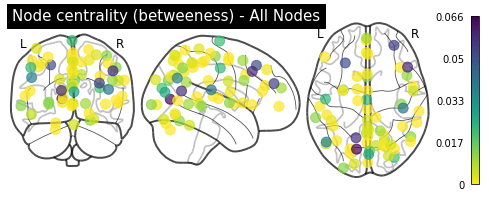

<Figure size 576x432 with 0 Axes>

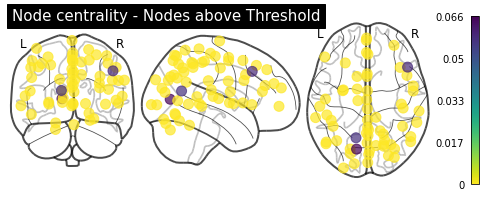

In [189]:
#Centralities plots
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
nx.set_edge_attributes(G, G_distance_dict, 'distance')

#closeness = nx.closeness_centrality(G, distance='distance')
closeness = nx.betweenness_centrality(G, weight='distance')
nx.set_node_attributes(G, closeness, 'closecent')

# Sort the nodes by closeness centrality (highest to lowest)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their centrality values
top_5_percent = int(len(sorted_closeness) * 0.05)
highest_nodes = sorted_closeness[:top_5_percent]

# Print all nodes and their closeness centrality values
print("Nodes sorted by closeness centrality (highest to lowest):")
for node_label, centrality in sorted_closeness:
    print(f"{node_label}: {centrality}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with closeness centrality values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node centrality (betweeness) - All Nodes')
plt.show()

# Replace centrality values below threshold with 0
for node_label, centrality in closeness.items():
    if centrality < threshold:
        closeness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node centrality - Nodes above Threshold')
plt.show()


Nodes sorted by clustering coefficient (highest to lowest):
Parieto-occipital sulcus anterior: 0.2985369929768628
Calcarine sulcus anterior: 0.2868558887442224
Cuneus: 0.2847692713108882
Middle frontal gyrus: 0.28012121147793984
Cingulate cortex posterior: 0.270563751146889
Angular gyrus inferior: 0.2703124184094074
Middle frontal gyrus anterior: 0.2684823146687091
Superior frontal sulcus: 0.268043167267806
Heschl’s gyrus: 0.2668042557442273
Parieto-occipital sulcus middle: 0.26204184901036776
Dorsomedial prefrontal cortex antero-superior: 0.2606246058479387
Lingual gyrus anterior: 0.260269143222641
Superior frontal gyrus medial: 0.2595280574150789
Lingual gyrus: 0.2572401198860522
Superior occipital gyrus: 0.25391757179150193
Central sulcus: 0.2536604356439285
Cerebellum I-V: 0.2509546803405114
Planum polare: 0.2503863135988815
Middle temporal gyrus: 0.25024231608106506
Putamen: 0.24717360081831977
Angular gyrus superior: 0.24290596608936743
Parieto-occipital sulcus superior: 0.242460

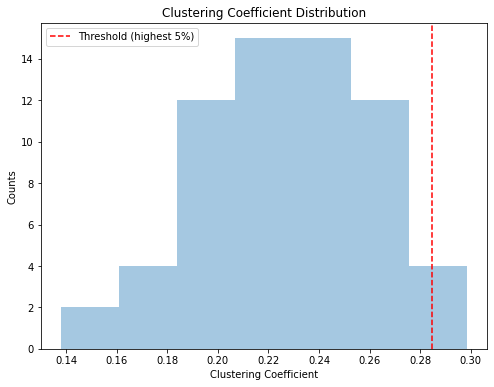

<Figure size 576x432 with 0 Axes>

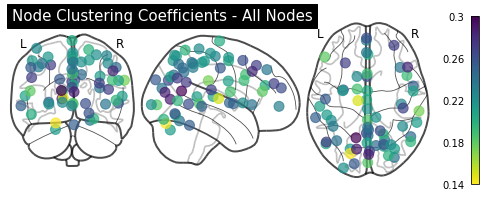

<Figure size 576x432 with 0 Axes>

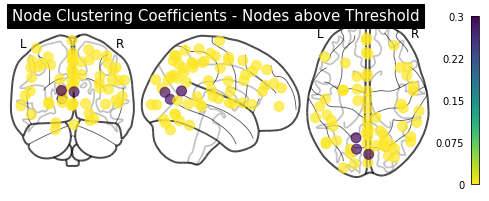

In [190]:
#Clustering coefficient
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Clustering Coefficient Calculation
clustering = nx.clustering(G, weight='weight')
nx.set_node_attributes(G, clustering, 'cc')

# Sort the nodes by clustering coefficient (highest to lowest)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their clustering coefficients
top_5_percent = int(len(sorted_clustering) * 0.05)
highest_nodes = sorted_clustering[:top_5_percent]

# Print all nodes and their clustering coefficients
print("Nodes sorted by clustering coefficient (highest to lowest):")
for node_label, cc in sorted_clustering:
    print(f"{node_label}: {cc}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Clustering Coefficient Histogram
plt.figure(figsize=(8, 6))
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Counts')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.title('Clustering Coefficient Distribution')
plt.show()

# Plot the graph with clustering coefficients as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - All Nodes')
plt.show()

# Replace clustering coefficients values below threshold with 0
for node_label, cc in clustering.items():
    if cc < threshold:
        clustering[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - Nodes above Threshold')
plt.show()


## 2.1 Intersubject predictions (correlation)

Producing Y having columns : ["total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

In [191]:
# dependant variables 
xlsx_path = r'C:\Users\Dylan\Desktop\UM_Bsc_neurocog\E22\Projet_Ivado_rainvillelab\test_dataset\test_data_ASL\Hypnosis_variables_20190114_pr_jc.xlsx'
rawY = pd.read_excel(xlsx_path, sheet_name=0, index_col=1, header=2).iloc[2:, [4, 17,18, 19, 38, 48,65, 67]]
rawY.columns= ['SHSS_score', 'raw_change_ANA','raw_change_HYPER', "total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", 'Automaticity_post_ind',"Abs_diff_automaticity"]

cleanY = rawY.iloc[:-6,:] # remove sub04, sub34 and last 6 rows
cutY = cleanY.drop(['APM04*', 'APM34*'])

filledY = cutY.fillna(cutY.astype(float).mean()).astype(float)
filledY['SHSS_groups'] = pd.cut(filledY['SHSS_score'], bins=[0, 4, 8, 12], labels=['0', '1', '2']) # encode 3 groups for SHSS scores

# reorder to match order on elm server
new_order = ['APM01', 'APM16', 'APM06', 'APM38', 'APM12', 'APM03', 'APM07', 'APM28', 'APM29', 'APM17', 'APM11', 'APM02',
             'APM15', 'APM05', 'APM32', 'APM42', 'APM35', 'APM43', 'APM41', 'APM08', 'APM36', 'APM27', 'APM33', 'APM22',
             'APM20', 'APM09', 'APM37', 'APM26', 'APM47', 'APM46', 'APM40']
#reorder to match elm server order
Y = pd.DataFrame(columns=filledY.columns)
for name in new_order:
    row = filledY.loc[name]
    Y.loc[name] = row



======= SHSS_score =======


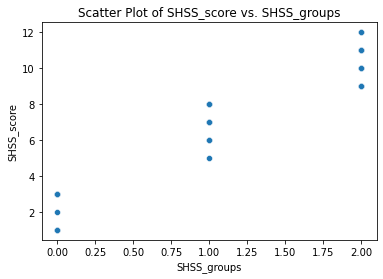

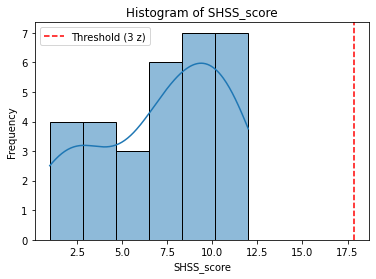

No extreme scores found.
-------------------


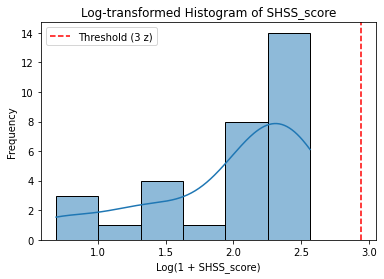

======= raw_change_ANA =======


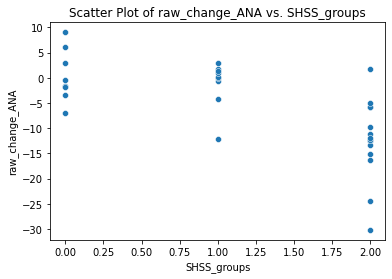

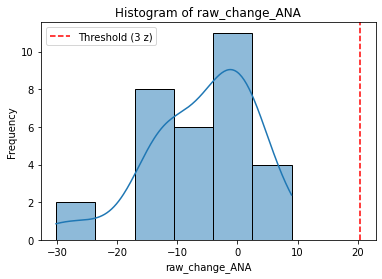

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


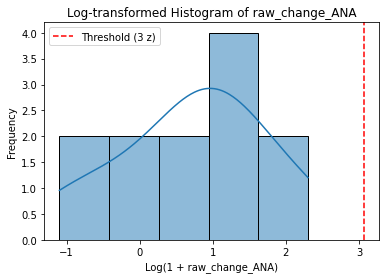

======= raw_change_HYPER =======


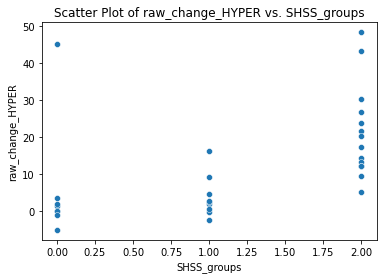

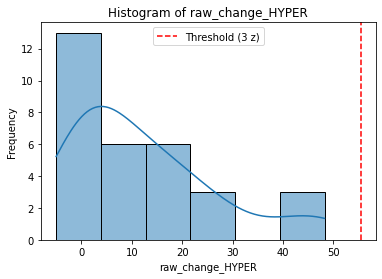

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


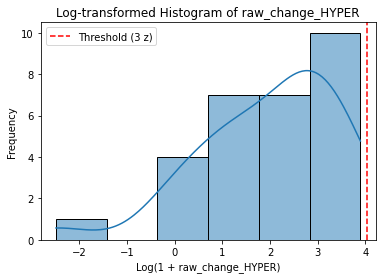

======= total_chge_pain_hypAna =======


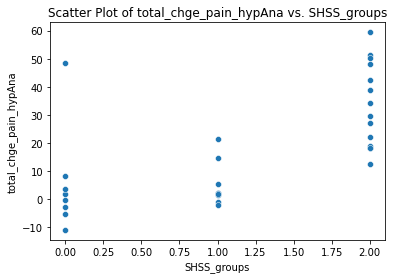

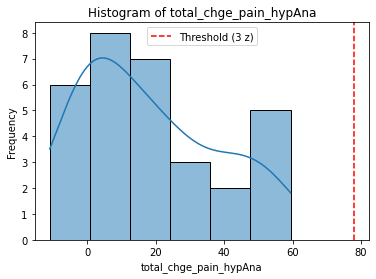

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


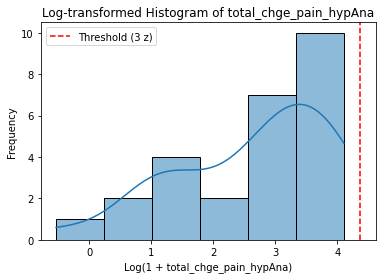

======= Chge_hypnotic_depth =======


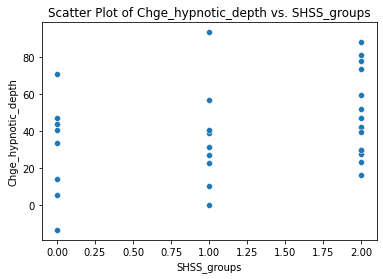

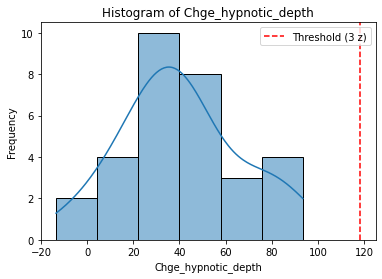

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


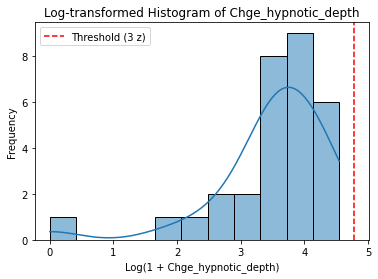

======= Mental_relax_absChange =======


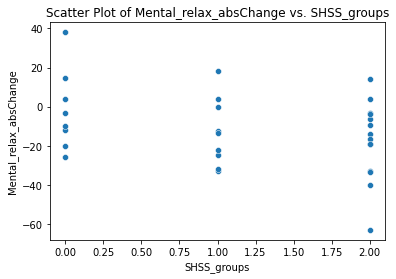

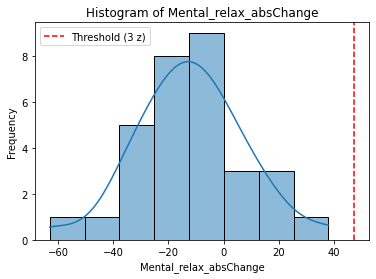

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


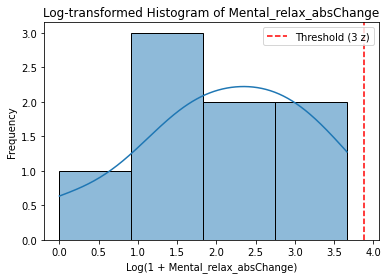

======= Automaticity_post_ind =======


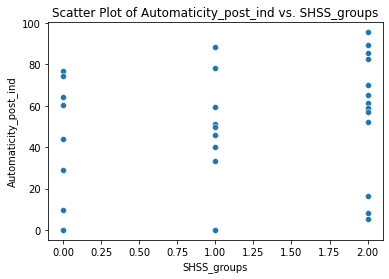

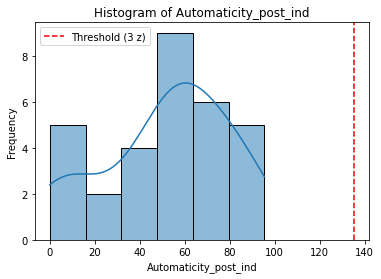

No extreme scores found.
-------------------


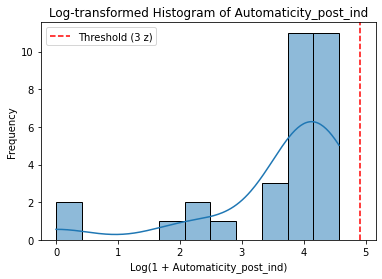

======= Abs_diff_automaticity =======


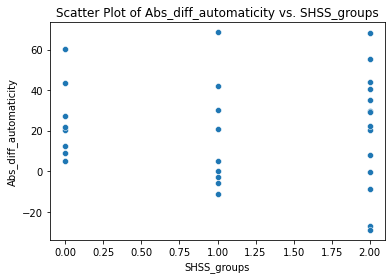

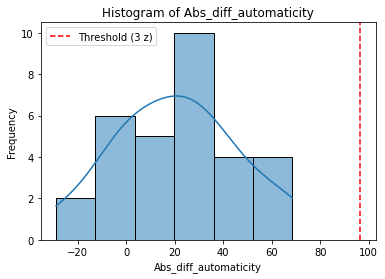

No extreme scores found.
-------------------


c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


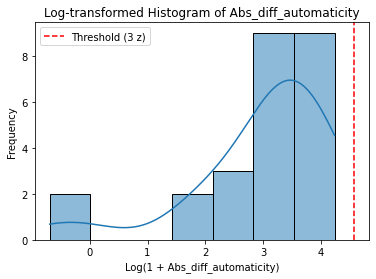

======= SHSS_groups =======


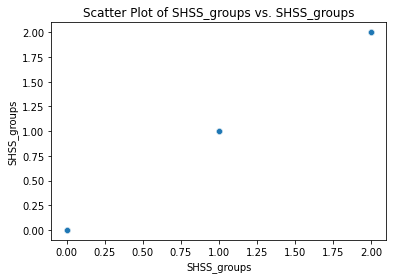

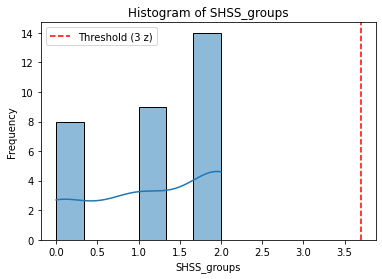

No extreme scores found.
-------------------


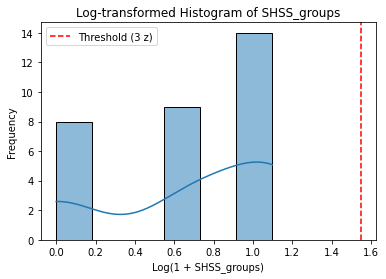

In [192]:
# check linearity of VD
Y = Y.apply(pd.to_numeric, errors='coerce')
Y = Y.dropna()

# Compute z-scores for each dependent variable
z_scores = (Y - Y.mean()) / Y.std()

# Set the threshold for extreme scores
z_threshold = 3

# Iterate through each dependent variable
for column in Y.columns:
    print(f"======= {column} =======")

    # Scatter plot of the dependent variable against SHSS_groups
    sns.scatterplot(data=Y, x='SHSS_groups', y=column)
    plt.xlabel('SHSS_groups')
    plt.ylabel(column)
    plt.title(f"Scatter Plot of {column} vs. SHSS_groups")
    plt.show()

    # Histogram of the dependent variable
    sns.histplot(Y[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {column}")
    plt.axvline(x=Y[column].mean() + z_threshold * Y[column].std(), color='red', linestyle='--', label=f'Threshold ({z_threshold} z)')
    plt.legend()
    plt.show()

    # Check for extreme scores with z values > 3
    extreme_scores = Y[np.abs(z_scores[column]) > z_threshold]
    if len(extreme_scores) > 0:
        print(f"Extreme Scores (> {z_threshold} z) for {column}:")
        print(extreme_scores)
    else:
        print("No extreme scores found.")

    print("-------------------")

    # Log-transformed histogram
    log_transformed_column = np.log1p(Y[column])
    sns.histplot(log_transformed_column, kde=True)
    plt.xlabel(f'Log(1 + {column})')
    plt.ylabel('Frequency')
    plt.title(f"Log-transformed Histogram of {column}")
    plt.axvline(x=np.log1p(Y[column].mean() + z_threshold * Y[column].std()), color='red', linestyle='--', label=f'Threshold ({z_threshold} z)')
    plt.legend()
    plt.show()


Initializing dict (Gs) with each subject's graph (len 31)

In [193]:
# Single-subject graphs
print(results.keys())
As = [results['contrast_connectomes'][i] for i in range(len(results['contrast_connectomes']))]

rawGs = {nx.from_numpy_matrix(A, create_using=nx.Graph) for A in As}
rawGs = {nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels))) for G in rawGs}

# add keys to make it a dict instead od a set
Gs = dict()
for name, G in zip(Y.index,rawGs): 
    Gs[name] = G
    #Gs[].edges(data=True)
print(Gs)


dict_keys(['pre_series', 'post_series', 'seed_pre_series', 'seed_post_series', 'seed_to_pre_correlations', 'seed_to_post_correlations', 'pre_connectomes', 'pre_mean_connectome', 'post_connectomes', 'post_mean_connectome', 'zcontrast_mean_connectome', 'contrast_connectomes', 'mean_seed_pre_connectome', 'mean_seed_post_connectome', 'mean_seed_contrast_connectome', 'preX', 'postX', 'contrastX'])


{'APM01': <networkx.classes.graph.Graph object at 0x000001B145B15840>, 'APM16': <networkx.classes.graph.Graph object at 0x000001B145B15870>, 'APM06': <networkx.classes.graph.Graph object at 0x000001B145D2A080>, 'APM38': <networkx.classes.graph.Graph object at 0x000001B145D2B880>, 'APM12': <networkx.classes.graph.Graph object at 0x000001B145B17100>, 'APM03': <networkx.classes.graph.Graph object at 0x000001B145D28970>, 'APM07': <networkx.classes.graph.Graph object at 0x000001B145D28190>, 'APM28': <networkx.classes.graph.Graph object at 0x000001B145B179D0>, 'APM29': <networkx.classes.graph.Graph object at 0x000001B145B17A00>, 'APM17': <networkx.classes.graph.Graph object at 0x000001B145B17AC0>, 'APM11': <networkx.classes.graph.Graph object at 0x000001B145B16AD0>, 'APM02': <networkx.classes.graph.Graph object at 0x000001B145D2B310>, 'APM15': <networkx.classes.graph.Graph object at 0x000001B145B15B70>, 'APM05': <networkx.classes.graph.Graph object at 0x000001B145D2B430>, 'APM32': <networkx.

Degree and centrality per participant's graph

In [194]:
for participant, graph in Gs.items():
    strength = graph.degree(weight='weight')
    strengths = {node: val for (node, val) in strength}
    nx.set_node_attributes(graph, strengths, 'strength')

    norm_strengths = {node: val * 1/(len(graph.nodes)-1) for (node, val) in strength}
    nx.set_node_attributes(graph, norm_strengths, 'strengthnorm')

# centrality
for participant, G in Gs.items():
    G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}
    nx.set_edge_attributes(G, G_distance_dict, 'distance')
    closeness = nx.betweenness_centrality (G, weight='distance')

    # Now we add the closeness centrality value as an attribute to the nodes
    nx.set_node_attributes(G, closeness, 'closecent')

for participant, graph in Gs.items():
    # Compute the clustering coefficient
    clust = nx.clustering(graph, weight='weight')

    # Add the clustering coefficient as a node attribute
    nx.set_node_attributes(graph, clust, 'clustering')

    




Creating X_degree feature matrix of shape N x nb. nodes : 31 x 64

In [195]:
participant_names = list(Gs.keys())
node_names = list(Gs[participant_names[0]].nodes())

X_con = results['contrastX'] 
print(X_con.shape)
X_degree = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    degrees = nx.get_node_attributes(graph, 'strengthnorm')
    for j, node in enumerate(node_names):
        X_degree[i, j] = degrees[node]

print(X_degree.shape)


X_centrality = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    centrality = nx.get_node_attributes(graph, 'closecent')
    for j, node in enumerate(node_names):
        X_centrality[i, j] = centrality[node]

print(X_centrality.shape)

X_clustering = np.zeros((len(participant_names), len(node_names)))
# Fill the features matrix with degree strength values
for i, participant in enumerate(participant_names):
    graph = Gs[participant]
    clustering = nx.get_node_attributes(graph, 'clustering')
    for j, node in enumerate(node_names):
        X_clustering[i, j] = clustering[node]

print(X_clustering.shape)


(31, 2016)
(31, 64)
(31, 64)
(31, 64)


SVR prediction for ["Abs_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

In [196]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, ShuffleSplit
from sklearn.svm import SVR
target_columns = ['SHSS_score', 'raw_change_ANA','raw_change_HYPER',"total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]

for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectivity_matrix', 'Degree', 'Centrality', 'clustering']):
    print('================ \n{}\n================'.format(g_metric))
    for target_column in target_columns:
        print(f"--- {target_column} ---")

        # Select the target column for prediction
        y = Y[target_column].values

        # Initialize SVR model
        svr = SVR()

        # Define the hyperparameter grid
        param_grid = {
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.3],
            'kernel': ['linear', 'rbf']
        }

        # Perform k-fold cross-validation with hyperparameter tuning
        k = 5  # Number of folds
        kf = KFold(n_splits=k, shuffle=True, random_state=42)

        grid_search = GridSearchCV(svr, param_grid, cv=kf)
        grid_search.fit(features_matrix, y)

        # Get the best SVR model
        best_svr = grid_search.best_estimator_
        print('SVR best params : ', best_svr)
        # Perform cross-validation on the best model
        mse_scores = cross_val_score(best_svr, features_matrix, y, scoring='neg_mean_squared_error', cv=kf)
        mae_scores = cross_val_score(best_svr, features_matrix, y, scoring='neg_mean_absolute_error', cv=kf)
        r2_scores = cross_val_score(best_svr, features_matrix, y, scoring='r2', cv=kf)

        # Calculate mean performance metrics across all folds
        mean_mse = -np.mean(mse_scores)
        mean_mae = -np.mean(mae_scores)
        mean_r2 = np.mean(r2_scores)
        
        # Print the mean performance metrics
        print("Mean MSE:", mean_mse)
        print("Mean MAE:", mean_mae)
        print("Mean R^2:", mean_r2)
        print("---")


connectivity_matrix
--- SHSS_score ---


SVR best params :  SVR(C=0.1, epsilon=0.3)
Mean MSE: 13.707682546096237
Mean MAE: 3.062949016107282
Mean R^2: -0.41265596427332724
---
--- raw_change_ANA ---
SVR best params :  SVR(C=1, epsilon=0.3, kernel='linear')
Mean MSE: 61.44125163391385
Mean MAE: 6.692554172258961
Mean R^2: -0.014904551208622597
---
--- raw_change_HYPER ---
SVR best params :  SVR(C=10, epsilon=0.3)
Mean MSE: 228.22707403918793
Mean MAE: 11.31954835156901
Mean R^2: -0.16843748414439244
---
--- total_chge_pain_hypAna ---
SVR best params :  SVR(C=1, epsilon=0.3)
Mean MSE: 403.37301889758487
Mean MAE: 16.761382026728654
Mean R^2: -0.09429314724987328
---
--- Chge_hypnotic_depth ---
SVR best params :  SVR(C=0.1)
Mean MSE: 731.2952382607317
Mean MAE: 21.680779748926554
Mean R^2: -0.5221689161886406
---
--- Mental_relax_absChange ---
SVR best params :  SVR(C=0.1, epsilon=0.3, kernel='linear')
Mean MSE: 380.3616522596093
Mean MAE: 14.869250318076093
Mean R^2: -0.17820167933598524
---
--- Abs_diff_automaticity ---
SVR be

In [197]:
def reg_plot_performance(y_test, y_pred, target_name, path_output='', filename='regplot'):
    """
    Plot the regression plot associated with the model performance. One regression line will be plotted per fold.

    Parameters
    ----------
    y_test: list
        list containing the values of y in the test set for each fold
    y_pred: list
        list containing the values of the predicted y for each fold
    target_name: string
        name of the target variable (Y-axis label)
    path_output: string
        path for saving the output
    filename: string
        name of the output file

    Code adapted from https://github.com/mpcoll/coll_painvalue_2021/tree/main/figures
    """
    import matplotlib.ticker as ticker

    blue_palette_10 = sns.color_palette("Blues", 10)
    fig1, ax1 = plt.subplots(figsize=(5, 5))
    ax1.set_xlim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    ax1.set_ylim([min([min(y) for y in y_test]), max([max(y) for y in y_test])])
    for idx, elem in enumerate(y_test):
        df = pd.DataFrame(list(zip(elem, y_pred[idx])), columns=['Y_true', 'Y_pred'])
        sns.regplot(data=df, x='Y_true', y='Y_pred',
                    ci=None, scatter=False, color=blue_palette_10[idx],
                    ax=ax1, line_kws={'linewidth': 1.4}, truncate=False)
        ax1.xaxis.set_major_locator(ticker.AutoLocator())
        ax1.yaxis.set_major_locator(ticker.AutoLocator())
    plt.xlabel(target_name)
    plt.ylabel('Cross-validated prediction')
    for axis in ['top', 'bottom', 'left', 'right']:
        ax1.spines[axis].set_linewidth(2.6)
    ax1.tick_params(width=2.6, direction='out', length=10)
    plt.show()


connectivity_matrix
--- SHSS_score ---


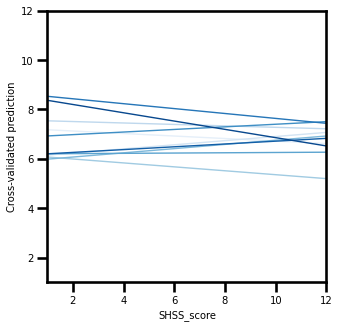

Mean Pearson's R: -0.053050985591860486
Mean RMSE: 3.697783964078778
Mean MAE: 3.2370929752575606
Mean R^2: -0.8241913828298942
---
--- raw_change_ANA ---


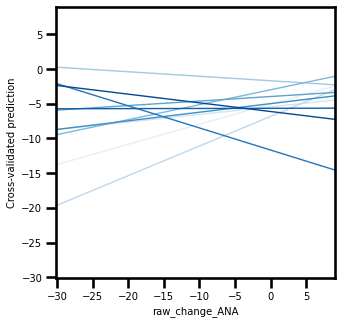

Mean Pearson's R: 0.24231548750249784
Mean RMSE: 8.330921012978186
Mean MAE: 7.382207602794457
Mean R^2: -0.35862303686230856
---
--- raw_change_HYPER ---


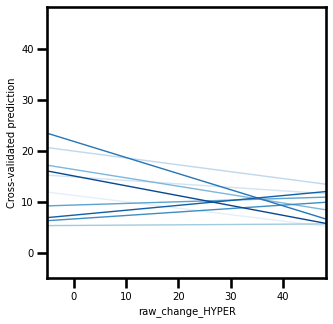

Mean Pearson's R: -0.2163039763440814
Mean RMSE: 17.264111151822927
Mean MAE: 13.657055418993773
Mean R^2: -0.9810918339446635
---
--- total_chge_pain_hypAna ---


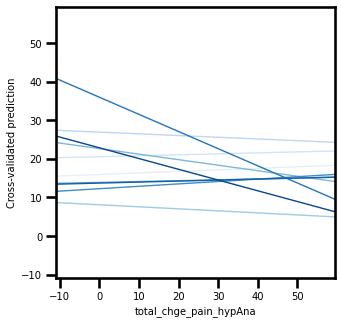

Mean Pearson's R: -0.1674838248810092
Mean RMSE: 23.689989349550558
Mean MAE: 20.021737345157234
Mean R^2: -0.6579409623933632
---
--- Chge_hypnotic_depth ---


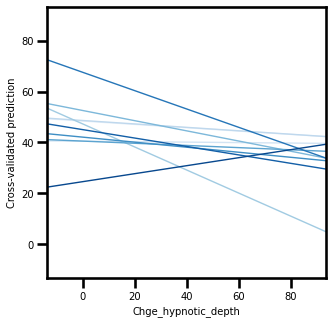

Mean Pearson's R: -0.25175930938620306
Mean RMSE: 33.20657108881578
Mean MAE: 28.766468875880566
Mean R^2: -1.0520338751482305
---
--- Mental_relax_absChange ---


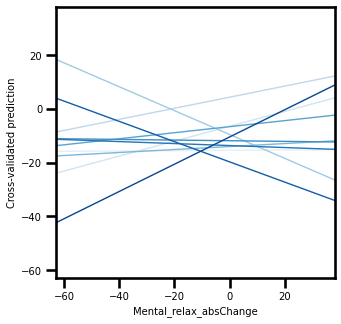

Mean Pearson's R: 0.03152333035378519
Mean RMSE: 18.638303017439462
Mean MAE: 14.88511982991433
Mean R^2: -0.8542299950530964
---
--- Abs_diff_automaticity ---


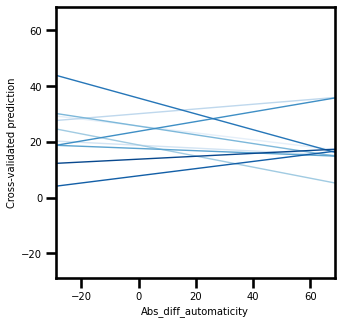

Mean Pearson's R: -0.12983706894473385
Mean RMSE: 28.874638153933468
Mean MAE: 24.823651031101182
Mean R^2: -0.4622982160261004
---
Degree
--- SHSS_score ---


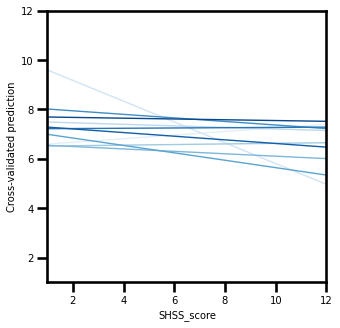

Mean Pearson's R: -0.18059327209812473
Mean RMSE: 3.7592072629507607
Mean MAE: 3.245381295103125
Mean R^2: -1.0305948287853965
---
--- raw_change_ANA ---


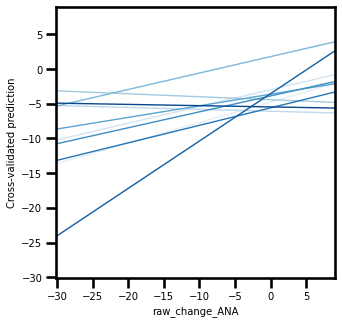

Mean Pearson's R: 0.37178832179927923
Mean RMSE: 8.10430553402372
Mean MAE: 6.848377533706246
Mean R^2: -0.24712409586916467
---
--- raw_change_HYPER ---


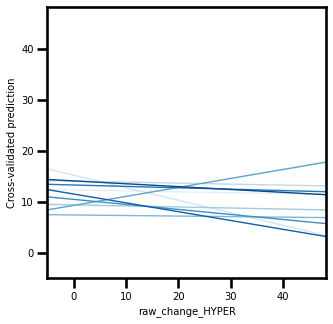

Mean Pearson's R: -0.1865136239751483
Mean RMSE: 16.329260314107252
Mean MAE: 12.651155174050938
Mean R^2: -0.6920001217475337
---
--- total_chge_pain_hypAna ---


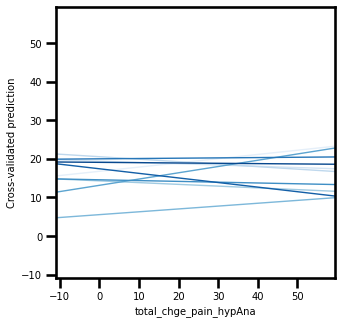

Mean Pearson's R: 0.06671026055223989
Mean RMSE: 21.993185278660818
Mean MAE: 18.414489235088798
Mean R^2: -0.421484768287198
---
--- Chge_hypnotic_depth ---


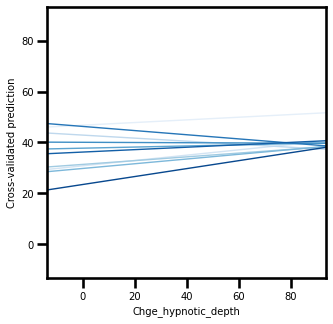

Mean Pearson's R: 0.21613062222980312
Mean RMSE: 28.228182638510606
Mean MAE: 23.925306161358034
Mean R^2: -0.564196793061627
---
--- Mental_relax_absChange ---


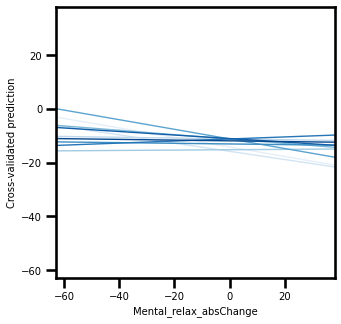

Mean Pearson's R: -0.2272011593707018
Mean RMSE: 17.86317843641847
Mean MAE: 13.419251874051714
Mean R^2: -0.5521368201018374
---
--- Abs_diff_automaticity ---


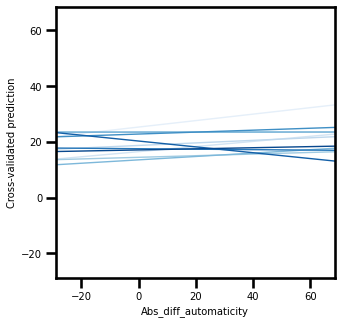

Mean Pearson's R: 0.11706772848442104
Mean RMSE: 27.301608547458606
Mean MAE: 22.501709633338272
Mean R^2: -0.2753022080177551
---
Centrality
--- SHSS_score ---


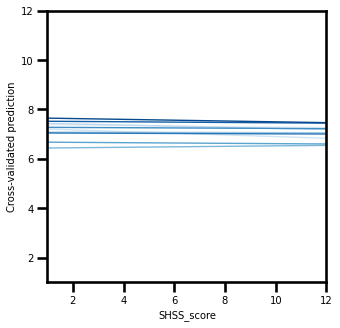

Mean Pearson's R: -0.32870901531844166
Mean RMSE: 3.4503852782780777
Mean MAE: 2.9623563751564044
Mean R^2: -0.603238073528761
---
--- raw_change_ANA ---


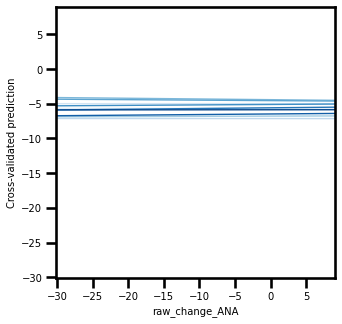

Mean Pearson's R: 0.04356225394590073
Mean RMSE: 8.485576947627852
Mean MAE: 7.26620245795227
Mean R^2: -0.2825895343657664
---
--- raw_change_HYPER ---


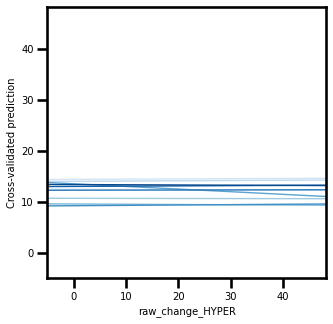

Mean Pearson's R: -0.032277083575515744
Mean RMSE: 15.299273618280356
Mean MAE: 12.290754018447332
Mean R^2: -0.5089680806187424
---
--- total_chge_pain_hypAna ---


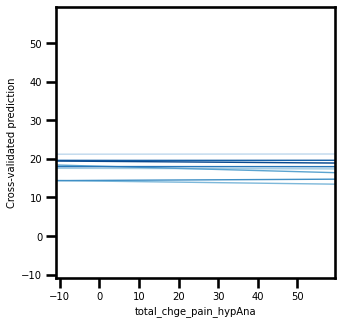

Mean Pearson's R: -0.17217079296354731
Mean RMSE: 20.980833853947626
Mean MAE: 18.08333268652052
Mean R^2: -0.26549211562406655
---
--- Chge_hypnotic_depth ---


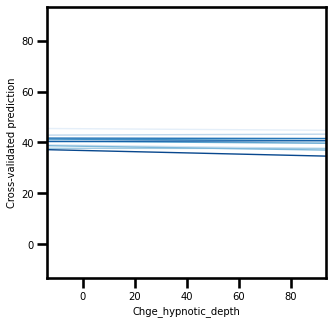

Mean Pearson's R: -0.20802760161363826
Mean RMSE: 27.554406863554128
Mean MAE: 23.11512037573738
Mean R^2: -0.4318333346262941
---
--- Mental_relax_absChange ---


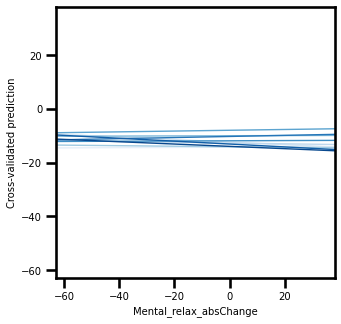

Mean Pearson's R: 0.004744678474334069
Mean RMSE: 16.684662761371918
Mean MAE: 13.116765886277184
Mean R^2: -0.36158413707303483
---
--- Abs_diff_automaticity ---


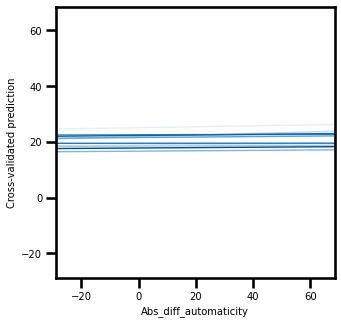

Mean Pearson's R: 0.3471334482930818
Mean RMSE: 26.693390826408933
Mean MAE: 22.77231691647693
Mean R^2: -0.21086712914562128
---
clustering
--- SHSS_score ---


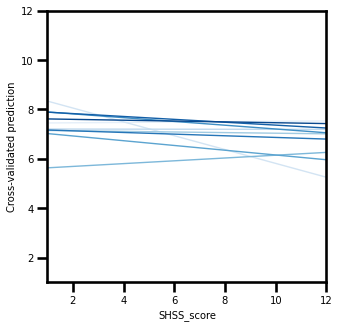

Mean Pearson's R: -0.2710506017607724
Mean RMSE: 3.6866742580316787
Mean MAE: 3.1922391284217912
Mean R^2: -0.9043486274146254
---
--- raw_change_ANA ---


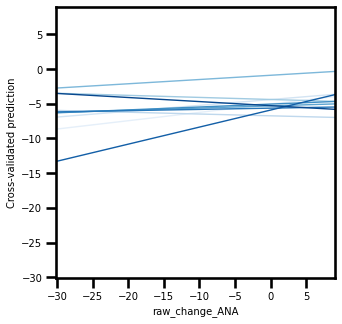

Mean Pearson's R: 0.20092768691380097
Mean RMSE: 8.38151002663728
Mean MAE: 7.390370731968902
Mean R^2: -0.270417861498249
---
--- raw_change_HYPER ---


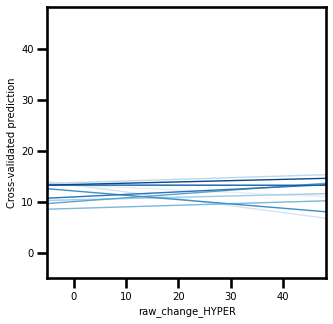

Mean Pearson's R: 0.1630925609741936
Mean RMSE: 15.152229623672792
Mean MAE: 12.08849481113191
Mean R^2: -0.43753034738692104
---
--- total_chge_pain_hypAna ---


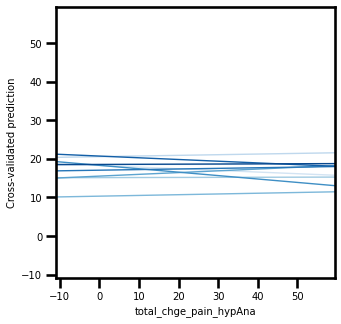

Mean Pearson's R: -0.01939896530501818
Mean RMSE: 21.242653490253524
Mean MAE: 18.55261590524557
Mean R^2: -0.2958876999911645
---
--- Chge_hypnotic_depth ---


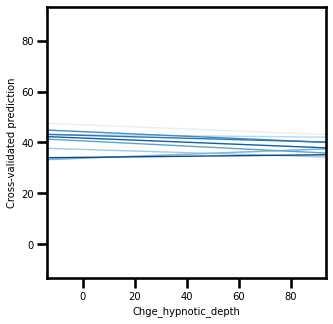

Mean Pearson's R: -0.10720011755085634
Mean RMSE: 28.435923944563562
Mean MAE: 23.77784050958739
Mean R^2: -0.519508699462753
---
--- Mental_relax_absChange ---


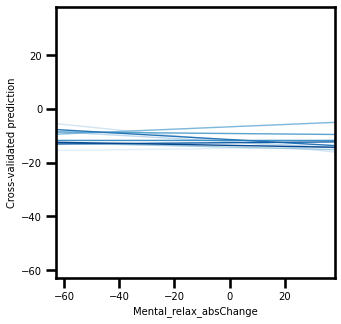

Mean Pearson's R: -0.17556148899542126
Mean RMSE: 17.060224670235705
Mean MAE: 13.442143157010701
Mean R^2: -0.4165487822564069
---
--- Abs_diff_automaticity ---


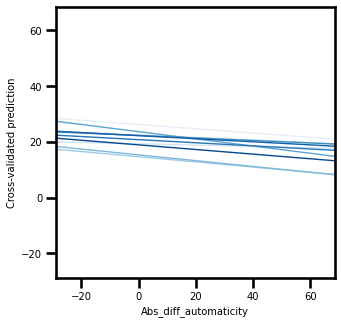

Mean Pearson's R: -0.5530388363736921
Mean RMSE: 29.201151328118545
Mean MAE: 24.810840718030363
Mean R^2: -0.47100922481375945
---


In [198]:
from scipy.stats import pearsonr
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LinearRegression

target_columns = ['SHSS_score', 'raw_change_ANA', 'raw_change_HYPER', "total_chge_pain_hypAna", "Chge_hypnotic_depth", "Mental_relax_absChange", "Abs_diff_automaticity"]



for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectivity_matrix', 'Degree', 'Centrality', 'clustering']):
    print('================ \n{}\n================'.format(g_metric))
    
    for target_column in target_columns:
        print(f"--- {target_column} ---")
        y_preds = []
        y_tests = []
        # Select the target column for prediction
        y = Y[target_column].values

        # Initialize Lasso model
        lasso = Ridge()

        # Perform k-fold cross-validation with scoring
        k = 10  # Number of folds
        kf = ShuffleSplit(n_splits=k, test_size = 0.20, random_state=42)

        pearson_r_scores = []
        r2_scores = []
        mae_scores = []
        mse_scores = []
        rmse_scores = []

        for train_index, test_index in kf.split(features_matrix):
            # Split the data into train and test sets based on the current fold
            X_train, X_test = features_matrix[train_index], features_matrix[test_index]
            y_train, y_test = y[train_index], y[test_index]

            # Fit the Lasso model to the training data
            lasso.fit(X_train, y_train)

            # Make predictions on the test data
            y_pred = lasso.predict(X_test)

            # Append y_pred and y_test to the respective lists
            y_preds.append(y_pred)
            y_tests.append(y_test)

            # Calculate evaluation metrics
            pearson_r, _ = pearsonr(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)
            mae = mean_absolute_error(y_test, y_pred)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)

            # Append metrics to the respective lists
            pearson_r_scores.append(pearson_r)
            r2_scores.append(r2)
            mae_scores.append(mae)
            mse_scores.append(mse)
            rmse_scores.append(rmse)

        reg_plot_performance(y_tests, y_preds, target_column)
        # Calculate mean metrics across all folds
        mean_pearson_r = np.mean(pearson_r_scores)
        mean_r2 = np.mean(r2_scores)
        mean_mae = np.mean(mae_scores)
        mean_mse = np.mean(mse_scores)
        mean_rmse = np.mean(rmse_scores)

        # Print the mean metrics
        print("Mean Pearson's R:", mean_pearson_r)
        print("Mean RMSE:", mean_rmse)
        print("Mean MAE:", mean_mae)
        print("Mean R^2:", mean_r2)
        print("---")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_predict, GridSearchCV

for features_matrix, g_metric in zip([X_con, X_degree, X_centrality, X_clustering], ['connectome','Degree', 'Centrality', 'Clustering']):
    # Assuming X is your feature matrix and y is the 'SHSS_groups' column
    X = features_matrix
    y = Y['SHSS_groups']

    # Create the SVC classifier
    classifier = SVC()

    # Define the parameter grid for hyperparameter tuning
    param_grid = {
        'C': [0.01, 1, 10],
        'gamma': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    }

    # Perform grid search with StratifiedKFold
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    grid_search = GridSearchCV(classifier, param_grid, cv=skf)
    grid_search.fit(X, y)

    # Get the best estimator and predictions
    best_estimator = grid_search.best_estimator_
    y_pred = cross_val_predict(best_estimator, X, y, cv=skf)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred, average='weighted')
    recall = recall_score(y, y_pred, average='weighted')
    f1 = f1_score(y, y_pred, average='weighted')

    # Print evaluation metrics and best hyperparameters
    print("---", g_metric, "---")
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)

    # Compute confusion matrix
    cm = confusion_matrix(y, y_pred)
    print("Confusion Matrix:")
    print(cm)


## Scale comparison

In [ ]:
resultspz, atlas, labels = load_all(p, 'difumo64_z_precision', 'difumo64') # z precision
resultspp, atlas, labels = load_all(p, 'difumo64_precision', 'difumo64') # psc precision
resultscovz, atlas, labels = load_all(p, 'difumo64_z_covariance', 'difumo64') # z covariance
resultscorz, atlas, labels = load_all(p, 'difumo64_z_correlation', 'difumo64') # z correlation (+arctanh correction)

In [ ]:
resultspz.keys()
# comparison of precisionz, precisionp, covz, corz
print('pre_mean_connectome', resultspz['pre_mean_connectome'].max(), '{:f}'.format(resultspp['pre_mean_connectome'].max()), resultscovz['pre_mean_connectome'].max(), resultscorz['pre_mean_connectome'].max())
print('post_mean_connectome', resultspz['post_mean_connectome'].max(), '{:f}'.format(resultspp['post_mean_connectome'].max()), resultscovz['post_mean_connectome'].max(), resultscorz['post_mean_connectome'].max())
print('zcontrast_mean_connectome', resultspz['zcontrast_mean_connectome'].max(), '{:f}'.format(resultspp['zcontrast_mean_connectome'].max()), resultscovz['zcontrast_mean_connectome'].max(), resultscorz['zcontrast_mean_connectome'].max())
print('pre_series', resultspz['pre_series'][0].max(), '{:f}'.format(resultspp['pre_series'][0].max()), resultscovz['pre_series'][0].max(), resultscorz['pre_series'][0].max())


# Graph theory (single graph)

In [ ]:
import matplotlib.cm as cm
from scipy import stats
from scipy.stats import ttest_1samp

A = results['zcontrast_mean_connectome']
G = nx.from_numpy_matrix(np.matrix(A), create_using=nx.Graph)
G = nx.relabel_nodes(G, dict(zip(range(len(G.nodes())),labels)))
G.edges.data('weight')
edge_weights = G.edges.data('weight')


In [ ]:
# Get the basic structure and dimensions of the keys
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Nodes:", G.nodes())
print("Edges:", G.edges())

### Edge density plot

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Dylan\AppData\Local\Temp\ipykernel_57392\1205525686.py:18: RuntimeWarning: invalid value encountered in log10
  log10dist = sns.distplot(np.log10(matrixdiagNaN).flatten(), kde=False, ax=axes[1], norm_hist=True)


[Text(0.5, 0, 'log(weights)')]

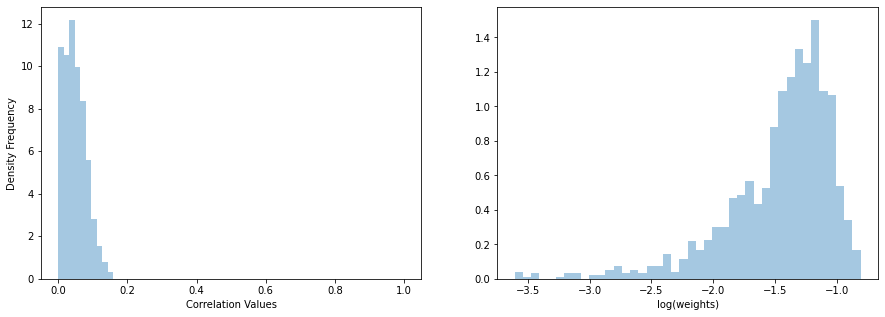

In [38]:
# plot heatmap
#plt.figure(figsize = (20, 20))
#_ = sns.heatmap(A, cmap='coolwarm', cbar=True, square=False, mask=None)
matrix = A
matrixdiagNaN = matrix.copy()
np.fill_diagonal(matrixdiagNaN,np.nan)

# Weight distribution plot
bins = np.arange(np.sqrt(len(np.concatenate(matrix))))
bins = (bins - np.min(bins))/np.ptp(bins)
fig, axes = plt.subplots(1,2, figsize=(15,5))

# Distribution of raw weights
rawdist = sns.distplot(matrixdiagNaN.flatten(), bins=bins, kde=False, ax=axes[0], norm_hist=True)
rawdist.set(xlabel='Correlation Values', ylabel = 'Density Frequency')

# Probability density of log10
log10dist = sns.distplot(np.log10(matrixdiagNaN).flatten(), kde=False, ax=axes[1], norm_hist=True)
log10dist.set(xlabel='log(weights)')

## Metrics

In [ ]:
import pygsp
G_fd = pygsp.graphs.Graph(A)
G_fd.compute_laplacian(lap_type="normalized")
G_fd.compute_fourier_basis()  # compute connectome harmonics

### Efficiency

In [ ]:

nx.global_efficiency(G)  # this gives efficiency for node 2 and 3


### Degree/Strength

Nodes sorted by degree (highest to lowest):
Middle frontal gyrus: 3.4629714840483086
Angular gyrus inferior: 3.2940604241855396
Calcarine sulcus anterior: 3.1590209709325356
Middle frontal gyrus anterior: 3.1503147623320067
Superior frontal sulcus: 3.0092678509700623
Superior frontal gyrus medial: 2.9375154698005903
Parieto-occipital sulcus anterior: 2.862738884451697
Cingulate cortex posterior: 2.817815174402064
Cerebellum I-V: 2.7448966690999677
Parieto-occipital sulcus middle: 2.6345160939505483
Angular gyrus superior: 2.578451413301711
Cuneus: 2.5130352397805216
Paracentral gyrus RH: 2.4961433871217347
Intraparietal sulcus: 2.478864654256787
Lingual gyrus: 2.4603376952117557
Precuneus anterior: 2.418738097767095
Cingulate gyrus mid-posterior: 2.3531183771897544
Lingual gyrus anterior: 2.251500442428438
Central sulcus: 2.22698482948959
Callosomarginal sulcus: 2.218555900247376
Superior frontal gyrus: 2.200133016130233
Intraparietal sulcus LH: 2.1728081059715154
Parieto-occipital sul

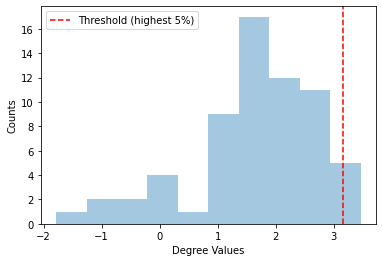

<Figure size 576x432 with 0 Axes>

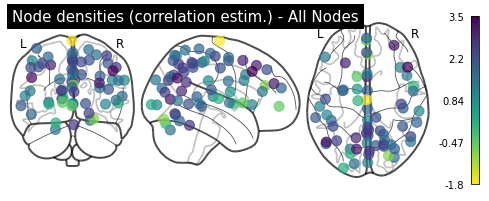

<Figure size 576x432 with 0 Axes>

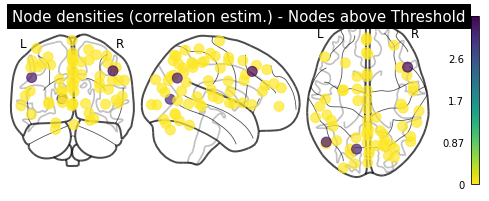

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the degree of the graph
degree = dict(G.degree(weight='weight'))

# Sort the nodes by degree (highest to lowest)
sorted_degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their degree values
top_5_percent = int(len(sorted_degree) * 0.05)
highest_nodes = sorted_degree[:top_5_percent]

# Print all nodes and their degree values
print("Nodes sorted by degree (highest to lowest):")
for node_label, deg in sorted_degree:
    print(f"{node_label}: {deg}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Degree Histogram
sns.distplot(list(degree.values()), kde=False, norm_hist=False)
plt.xlabel('Degree Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with degree values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace degree values below threshold with 0
for node_label, deg in degree.items():
    if deg < threshold:
        degree[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([degree[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


In [ ]:
# degree
#Vertex degree quantifies the total number of vertex connections in an undirected binary network (Fornito et al. 2016)
G.degree(weight='weight')
strength = G.degree(weight='weight')
strengths = {node: val for (node, val) in strength}
nx.set_node_attributes(G, dict(strength), 'strength') # Add as nodal attribute

# Normalized node strength values 1/N-1
normstrenghts = {node: val * 1/(len(G.nodes)-1) for (node, val) in strength}
nx.set_node_attributes(G, normstrenghts, 'strengthnorm') # Add as nodal attribute

# Computing the mean degree of the network
normstrengthlist = np.array([val * 1/(len(G.nodes)-1) for (node, val) in strength])
mean_degree = np.sum(normstrengthlist)/len(G.nodes)
print('mean_degree :', mean_degree)
print(strengths)


### Centrality

c:\Users\Dylan\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: name 'coords' is not defined

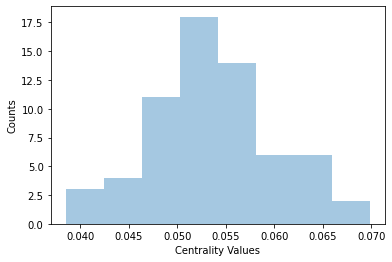

In [46]:
# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness Centrality
closeness = nx.closeness_centrality(G, distance='distance')

# Now we add the closeness centrality value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

plotting.plot_markers([closeness[key] for key in sorted(closeness.keys())], coords)

print(['{} : {}'.format(node, G.nodes[node]['closecent']) for node in G.nodes if G.nodes[node]['closecent'] > 0.135])

Clossness centrality

Nodes sorted by closeness centrality (highest to lowest):
Parieto-occipital sulcus anterior: 0.06988447722761773
Calcarine sulcus anterior: 0.06647938651409918
Middle frontal gyrus anterior: 0.0655177258936116
Superior frontal sulcus: 0.06482598080918751
Cuneus: 0.06471241656307453
Middle frontal gyrus: 0.06401441734496643
Angular gyrus inferior: 0.06250674523176128
Heschl’s gyrus: 0.06245340608560281
Central sulcus: 0.06148636129381397
Parieto-occipital sulcus middle: 0.06147308116777434
Putamen: 0.06041617391419897
Cingulate cortex posterior: 0.06012963362871409
Paracentral gyrus RH: 0.060111523652608266
Superior frontal gyrus medial: 0.05873857687800845
Cerebellum I-V: 0.058021389110060495
Precuneus anterior: 0.05784961230540359
Dorsomedial prefrontal cortex antero-superior: 0.05764348910793004
Superior occipital gyrus: 0.05739345981916684
Middle temporal gyrus: 0.05705141400262267
Fusiform gyrus: 0.05650226986176506
Lingual gyrus anterior: 0.05634942573900021
Descending occipital g

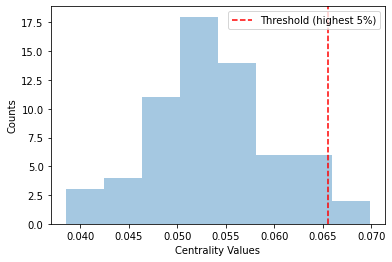

<Figure size 576x432 with 0 Axes>

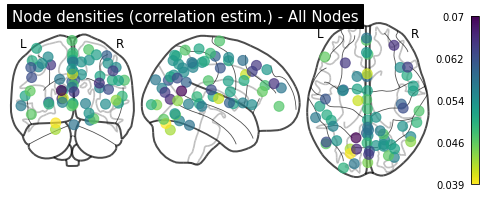

<Figure size 576x432 with 0 Axes>

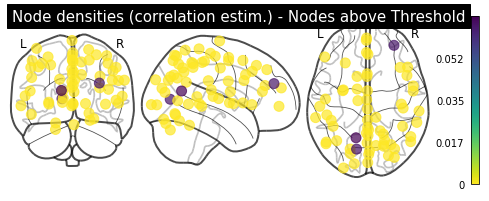

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# The function accepts a argument 'distance' that, in correlation-based networks, must be seen as the inverse ... 
# of the weight value. Thus, a high correlation value (e.g., 0.8) means a shorter distance (i.e., 0.2).
G_distance_dict = {(e1, e2): 1 / abs(weight) for e1, e2, weight in G.edges(data='weight')}

# Then add them as attributes to the graph edges
nx.set_edge_attributes(G, G_distance_dict, 'distance')

# Computation of Closeness Centrality
closeness = nx.closeness_centrality(G, distance='distance')

# Now we add the closeness centrality value as an attribute to the nodes
nx.set_node_attributes(G, closeness, 'closecent')

# Sort the nodes by closeness centrality (highest to lowest)
sorted_closeness = sorted(closeness.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their centrality values
top_5_percent = int(len(sorted_closeness) * 0.05)
highest_nodes = sorted_closeness[:top_5_percent]

# Print all nodes and their closeness centrality values
print("Nodes sorted by closeness centrality (highest to lowest):")
for node_label, centrality in sorted_closeness:
    print(f"{node_label}: {centrality}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Closeness Centrality Histogram
sns.distplot(list(closeness.values()), kde=False, norm_hist=False)
plt.xlabel('Centrality Values')
plt.ylabel('Counts')

# Plot the highest 5% values on the histogram
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.show()

# Plot the graph with closeness centrality values as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - All Nodes')
plt.show()

# Replace centrality values below threshold with 0
for node_label, centrality in closeness.items():
    if centrality < threshold:
        closeness[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([closeness[node] for node in G.nodes], coords, title='Node densities (correlation estim.) - Nodes above Threshold')
plt.show()


### Distance and shortest path

"The shortest path is the path with the least number of edges (or least total weight) between two vertices in a network. In a weighted graph, the shortest path is calculated by the minimum sum of the weights of edges between two vertices (Fornito et al. 2016). 
he weights must be converted to ‘distance’ by computing the inverse of the original weight (1−weight or 1weight); a higher correlation value represents a shorter distance (Fornito et al. 2016)"(Centeno,2022)

In [43]:
# Distance
dist_dict = {(e1,e2): 1/abs(weight) for e1,e2 ,weight in G.edges.data('weight')}
nx.set_edge_attributes(G, dist_dict,'distance')

# Shortest path
short_path = dict(nx.all_pairs_dijkstra_path_length(G, weight='distance'))

In [44]:
short_path

{'Superior frontal sulcus': {'Superior frontal sulcus': 0,
  'Dorsomedial prefrontal cortex antero-superior': 6.8456822947838285,
  'Superior occipital gyrus': 7.281185546115225,
  'Heschl’s gyrus': 7.711226405836861,
  'Planum temporale': 8.152253917495992,
  'Parieto-occipital sulcus anterior': 8.311876732647379,
  'Parieto-occipital sulcus middle': 9.05499338504291,
  'Cuneus': 9.479186327059649,
  'Precentral gyrus superior': 9.576633980378302,
  'Putamen': 9.653077922883037,
  'Angular gyrus inferior': 9.778472527632571,
  'Superior temporal sulcus with angular gyrus': 10.00250052154236,
  'Descending occipital gyrus': 10.055468534686405,
  'Supramarginal gyrus': 10.303159398158389,
  'Caudate': 10.47950592056114,
  'Precuneus superior': 10.561887607721188,
  'Insula antero-superior': 10.646730099158834,
  'Middle temporal gyrus': 10.808910290087656,
  'Angular gyrus superior': 10.813957118774875,
  'Superior rostral gyrus': 11.612285067631245,
  'Calcarine sulcus anterior': 11.92

### *Clustering coefficient
The clustering coefficient assesses the tendency for any two neighbours of a vertex to be directly connected (or more strongly connected in the weighted case) to each other and can also be termed cliquishness (Hallquist and Hillary 2018)

Nodes sorted by clustering coefficient (highest to lowest):
Superior parietal lobule anterior: 0.16698247623250193
Paracentral lobule: 0.1634762663142077
Paracentral lobule superior: 0.15191232893402357
Postcentral gyrus LH: 0.14687860370513153
Superior frontal gyrus: 0.14599035222413145
Paracentral gyrus RH: 0.14598646245654032
Cuneus: 0.14234755147244
Lingual gyrus: 0.14232524050663162
Parieto-occipital sulcus middle: 0.1411913145415385
Superior parts of Postcentral and Precentral gyri: 0.14118667772593815
Superior occipital gyrus: 0.1387150550888742
Central sulcus: 0.13490044728298412
Calcarine sulcus anterior: 0.13385592571098967
Callosomarginal sulcus: 0.13133514004426655
Precentral gyrus superior: 0.13119137391002358
Precuneus superior: 0.1268447873169502
Cingulate gyrus mid-posterior: 0.12618660268160334
Precuneus anterior: 0.12496099992198123
Parieto-occipital sulcus superior: 0.12337776247472002
Middle frontal gyrus: 0.11868833567929851
Transverse sinus: 0.11792003811184852
Li

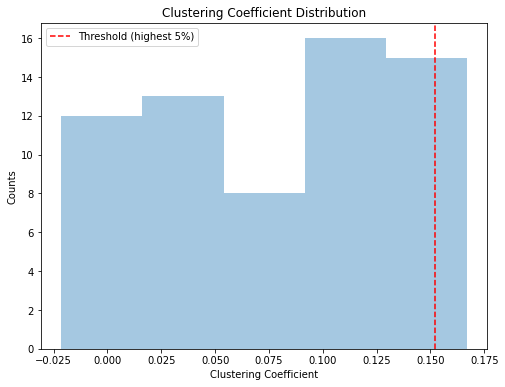

<Figure size 576x432 with 0 Axes>

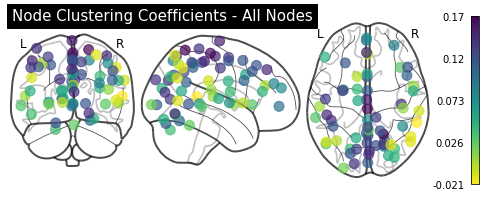

<Figure size 576x432 with 0 Axes>

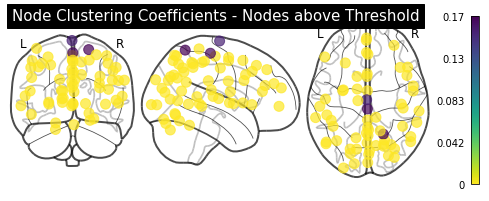

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Clustering Coefficient Calculation
clustering = nx.clustering(G, weight='weight')
nx.set_node_attributes(G, clustering, 'cc')

# Sort the nodes by clustering coefficient (highest to lowest)
sorted_clustering = sorted(clustering.items(), key=lambda x: x[1], reverse=True)

# Get the highest 5% of nodes and their clustering coefficients
top_5_percent = int(len(sorted_clustering) * 0.05)
highest_nodes = sorted_clustering[:top_5_percent]

# Print all nodes and their clustering coefficients
print("Nodes sorted by clustering coefficient (highest to lowest):")
for node_label, cc in sorted_clustering:
    print(f"{node_label}: {cc}")

# Print the threshold value
threshold = highest_nodes[-1][1]
print(f"Threshold (highest 5%): {threshold}")

# Clustering Coefficient Histogram
plt.figure(figsize=(8, 6))
sns.distplot(list(clustering.values()), kde=False, norm_hist=False)
plt.xlabel('Clustering Coefficient')
plt.ylabel('Counts')
plt.axvline(x=threshold, color='red', linestyle='--', label='Threshold (highest 5%)')
plt.legend()
plt.title('Clustering Coefficient Distribution')
plt.show()

# Plot the graph with clustering coefficients as the node markers
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

# Plot the marker plot with all nodes
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - All Nodes')
plt.show()

# Replace clustering coefficients values below threshold with 0
for node_label, cc in clustering.items():
    if cc < threshold:
        clustering[node_label] = 0

# Plot the marker plot with only nodes above the threshold
plt.figure(figsize=(8, 6))
plotting.plot_markers([clustering[node] for node in G.nodes], coords, title='Node Clustering Coefficients - Nodes above Threshold')
plt.show()


### ? *Modularity


In [34]:
#part = nx.community.best_partition(G, weight='weight') # Louvain algorithm
from networkx import community
#part = community.best_partition(G, weight='weight')

# check number of communities
#set(part.values()).union()
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
nx.community.modularity(G, top_level_communities)
top_level_communities


NameError: name 'G' is not defined

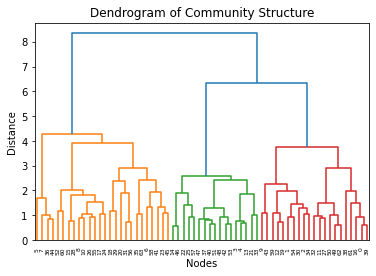

NotAPartition: Graph with 64 nodes and 2016 edges is not a valid partition of the graph ['Superior frontal sulcus']

In [86]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

# Your code to generate the communities
communities_generator = nx.community.girvan_newman(G)
top_level_communities = next(communities_generator)
modularity = nx.community.modularity(G, top_level_communities)

# Create a dendrogram of the community structure
dendrogram = sch.dendrogram(sch.linkage(nx.to_numpy_array(G), method='ward'))

# Set plot labels and title
plt.xlabel('Nodes')
plt.ylabel('Distance')
plt.title('Dendrogram of Community Structure')

# Show the plot
plt.show()

# Create a bar plot to show the modularity of each community
community_modularities = [nx.community.modularity(G, community) for community in top_level_communities]
community_labels = [f'Community {i + 1}' for i in range(len(top_level_communities))]

plt.bar(community_labels, community_modularities)
plt.xlabel('Community')
plt.ylabel('Modularity')
plt.title('Modularity of Top-Level Communities')
plt.xticks(rotation=45)

# Show the plot
plt.show()


### Visualization

## Clustering

In [ ]:
lcc = nx.clustering(G, weight='weight')

<Figure size 576x432 with 0 Axes>

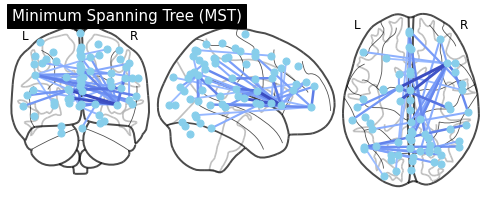

In [88]:
# minimum spanning tree
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting

# Compute the minimum spanning tree
mst = nx.minimum_spanning_tree(G, weight='weight')

# Plot the MST on the brain template
coords = plotting.find_probabilistic_atlas_cut_coords(atlas) 

plt.figure(figsize=(8, 6))
plotting.plot_connectome(adjacency_matrix=nx.to_numpy_array(mst),
                         node_coords=coords,
                         node_color='skyblue',
                         edge_cmap='coolwarm',
                         edge_threshold='98%',
                         title='Minimum Spanning Tree (MST)')
plt.show()
